# Explore Data
    Clinical_data: contains clinical data for each sample (inside 'None')
    goodlist: tells for each pixel in the unfolded MSI_data_cube if it is a MSI spectrum or not
    HE_image: histological image for each sample
    MSI_data_cube: contains the spectral data in the z-dimension; not every pixel is associated to a MSI spectrum (see goodlist)
    peak_list: contains information about the peaks (mz value, average intensity, lower boundary, upper boundary)
    pixel_to_sample_ID: tells for each pixel in the MSI_data_cube to which sample_ID it belongs; can be linked to sample_ID of Clinical_data table
    x: width of dataset in pixels
    y: height of dataset in pixels
    z: number of peaks (z-dimension of MSI_data_cube)

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Load Gastric Cancer Data

In [3]:
gc_data = scipy.io.loadmat('gastric_cancer_dataset.mat')
gc_data

{'HE_image': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'MSI_data_cube': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
 

# See Important Keys in gc_data

In [4]:
gc_data.keys()

dict_keys(['HE_image', 'x', 'goodlist', 'z', '__function_workspace__', 'y', 'peak_list', '__header__', '__version__', 'MSI_data_cube', 'None', 'pixel_to_sample_ID', '__globals__'])

# Good list contain 2 types of pixel:
1. background Pixel (0)
2. Pixel of Protein in gc_data (1)

## Get Indexes for All Spectra Data (No Background)

In [5]:
pixels = gc_data['goodlist']
print("Number/size of pixels in gc_data:", pixels.size)
print("Shape of pixels in gc_data:", pixels.shape)

pixels_list = list(pixels)
ones = []

for i in range(0, len(pixels_list)):
    if (pixels_list[i] == 1):
        ones.append(i)

for j in range(0, len(ones)):
    print("Index of pixels with value of %d is: %d" % (1, ones[j]))

Number/size of pixels in gc_data: 732279
Shape of pixels in gc_data: (732279, 1)
Index of pixels with value of 1 is: 42
Index of pixels with value of 1 is: 234
Index of pixels with value of 1 is: 235
Index of pixels with value of 1 is: 346
Index of pixels with value of 1 is: 347
Index of pixels with value of 1 is: 348
Index of pixels with value of 1 is: 351
Index of pixels with value of 1 is: 484
Index of pixels with value of 1 is: 485
Index of pixels with value of 1 is: 486
Index of pixels with value of 1 is: 677
Index of pixels with value of 1 is: 678
Index of pixels with value of 1 is: 679
Index of pixels with value of 1 is: 787
Index of pixels with value of 1 is: 788
Index of pixels with value of 1 is: 789
Index of pixels with value of 1 is: 790
Index of pixels with value of 1 is: 791
Index of pixels with value of 1 is: 793
Index of pixels with value of 1 is: 794
Index of pixels with value of 1 is: 795
Index of pixels with value of 1 is: 800
Index of pixels with value of 1 is: 801


Index of pixels with value of 1 is: 11881
Index of pixels with value of 1 is: 11882
Index of pixels with value of 1 is: 11883
Index of pixels with value of 1 is: 11884
Index of pixels with value of 1 is: 11886
Index of pixels with value of 1 is: 11887
Index of pixels with value of 1 is: 11888
Index of pixels with value of 1 is: 11890
Index of pixels with value of 1 is: 11891
Index of pixels with value of 1 is: 11892
Index of pixels with value of 1 is: 11893
Index of pixels with value of 1 is: 11894
Index of pixels with value of 1 is: 11895
Index of pixels with value of 1 is: 11896
Index of pixels with value of 1 is: 11897
Index of pixels with value of 1 is: 11899
Index of pixels with value of 1 is: 11976
Index of pixels with value of 1 is: 11977
Index of pixels with value of 1 is: 11978
Index of pixels with value of 1 is: 11979
Index of pixels with value of 1 is: 11980
Index of pixels with value of 1 is: 11981
Index of pixels with value of 1 is: 11982
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 16011
Index of pixels with value of 1 is: 16012
Index of pixels with value of 1 is: 16013
Index of pixels with value of 1 is: 16014
Index of pixels with value of 1 is: 16015
Index of pixels with value of 1 is: 16016
Index of pixels with value of 1 is: 16017
Index of pixels with value of 1 is: 16018
Index of pixels with value of 1 is: 16019
Index of pixels with value of 1 is: 16020
Index of pixels with value of 1 is: 16021
Index of pixels with value of 1 is: 16022
Index of pixels with value of 1 is: 16023
Index of pixels with value of 1 is: 16024
Index of pixels with value of 1 is: 16025
Index of pixels with value of 1 is: 16026
Index of pixels with value of 1 is: 16299
Index of pixels with value of 1 is: 16300
Index of pixels with value of 1 is: 16301
Index of pixels with value of 1 is: 16302
Index of pixels with value of 1 is: 16306
Index of pixels with value of 1 is: 16307
Index of pixels with value of 1 is: 16308
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 20300
Index of pixels with value of 1 is: 20301
Index of pixels with value of 1 is: 20303
Index of pixels with value of 1 is: 20304
Index of pixels with value of 1 is: 20306
Index of pixels with value of 1 is: 20307
Index of pixels with value of 1 is: 20308
Index of pixels with value of 1 is: 20309
Index of pixels with value of 1 is: 20310
Index of pixels with value of 1 is: 20311
Index of pixels with value of 1 is: 20312
Index of pixels with value of 1 is: 20313
Index of pixels with value of 1 is: 20314
Index of pixels with value of 1 is: 20315
Index of pixels with value of 1 is: 20318
Index of pixels with value of 1 is: 20319
Index of pixels with value of 1 is: 20382
Index of pixels with value of 1 is: 20383
Index of pixels with value of 1 is: 20384
Index of pixels with value of 1 is: 20385
Index of pixels with value of 1 is: 20386
Index of pixels with value of 1 is: 20387
Index of pixels with value of 1 is: 20388
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 23991
Index of pixels with value of 1 is: 23992
Index of pixels with value of 1 is: 23993
Index of pixels with value of 1 is: 23994
Index of pixels with value of 1 is: 23995
Index of pixels with value of 1 is: 23996
Index of pixels with value of 1 is: 23997
Index of pixels with value of 1 is: 23998
Index of pixels with value of 1 is: 23999
Index of pixels with value of 1 is: 24000
Index of pixels with value of 1 is: 24001
Index of pixels with value of 1 is: 24002
Index of pixels with value of 1 is: 24003
Index of pixels with value of 1 is: 24004
Index of pixels with value of 1 is: 24005
Index of pixels with value of 1 is: 24006
Index of pixels with value of 1 is: 24007
Index of pixels with value of 1 is: 24008
Index of pixels with value of 1 is: 24009
Index of pixels with value of 1 is: 24010
Index of pixels with value of 1 is: 24011
Index of pixels with value of 1 is: 24012
Index of pixels with value of 1 is: 24013
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 29276
Index of pixels with value of 1 is: 29277
Index of pixels with value of 1 is: 29278
Index of pixels with value of 1 is: 29279
Index of pixels with value of 1 is: 29280
Index of pixels with value of 1 is: 29281
Index of pixels with value of 1 is: 29282
Index of pixels with value of 1 is: 29283
Index of pixels with value of 1 is: 29284
Index of pixels with value of 1 is: 29285
Index of pixels with value of 1 is: 29286
Index of pixels with value of 1 is: 29287
Index of pixels with value of 1 is: 29288
Index of pixels with value of 1 is: 29289
Index of pixels with value of 1 is: 29290
Index of pixels with value of 1 is: 29291
Index of pixels with value of 1 is: 29292
Index of pixels with value of 1 is: 29293
Index of pixels with value of 1 is: 29294
Index of pixels with value of 1 is: 29295
Index of pixels with value of 1 is: 29296
Index of pixels with value of 1 is: 29297
Index of pixels with value of 1 is: 29298
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 39026
Index of pixels with value of 1 is: 39027
Index of pixels with value of 1 is: 39028
Index of pixels with value of 1 is: 39029
Index of pixels with value of 1 is: 39030
Index of pixels with value of 1 is: 39031
Index of pixels with value of 1 is: 39032
Index of pixels with value of 1 is: 39033
Index of pixels with value of 1 is: 39034
Index of pixels with value of 1 is: 39035
Index of pixels with value of 1 is: 39036
Index of pixels with value of 1 is: 39037
Index of pixels with value of 1 is: 39038
Index of pixels with value of 1 is: 39039
Index of pixels with value of 1 is: 39355
Index of pixels with value of 1 is: 39356
Index of pixels with value of 1 is: 39357
Index of pixels with value of 1 is: 39358
Index of pixels with value of 1 is: 39359
Index of pixels with value of 1 is: 39360
Index of pixels with value of 1 is: 39362
Index of pixels with value of 1 is: 39363
Index of pixels with value of 1 is: 39366
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 49839
Index of pixels with value of 1 is: 49840
Index of pixels with value of 1 is: 49841
Index of pixels with value of 1 is: 49842
Index of pixels with value of 1 is: 49843
Index of pixels with value of 1 is: 49844
Index of pixels with value of 1 is: 49845
Index of pixels with value of 1 is: 49846
Index of pixels with value of 1 is: 49847
Index of pixels with value of 1 is: 49848
Index of pixels with value of 1 is: 49849
Index of pixels with value of 1 is: 49850
Index of pixels with value of 1 is: 49851
Index of pixels with value of 1 is: 49852
Index of pixels with value of 1 is: 49853
Index of pixels with value of 1 is: 49854
Index of pixels with value of 1 is: 49855
Index of pixels with value of 1 is: 49948
Index of pixels with value of 1 is: 49949
Index of pixels with value of 1 is: 49950
Index of pixels with value of 1 is: 49951
Index of pixels with value of 1 is: 49952
Index of pixels with value of 1 is: 49953
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 55615
Index of pixels with value of 1 is: 55616
Index of pixels with value of 1 is: 55617
Index of pixels with value of 1 is: 55618
Index of pixels with value of 1 is: 55619
Index of pixels with value of 1 is: 55620
Index of pixels with value of 1 is: 55820
Index of pixels with value of 1 is: 55821
Index of pixels with value of 1 is: 55822
Index of pixels with value of 1 is: 55823
Index of pixels with value of 1 is: 55824
Index of pixels with value of 1 is: 55825
Index of pixels with value of 1 is: 55826
Index of pixels with value of 1 is: 55827
Index of pixels with value of 1 is: 55828
Index of pixels with value of 1 is: 55829
Index of pixels with value of 1 is: 55830
Index of pixels with value of 1 is: 55831
Index of pixels with value of 1 is: 55832
Index of pixels with value of 1 is: 55847
Index of pixels with value of 1 is: 55848
Index of pixels with value of 1 is: 55849
Index of pixels with value of 1 is: 55850
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 59534
Index of pixels with value of 1 is: 59535
Index of pixels with value of 1 is: 59536
Index of pixels with value of 1 is: 59537
Index of pixels with value of 1 is: 59538
Index of pixels with value of 1 is: 59539
Index of pixels with value of 1 is: 59540
Index of pixels with value of 1 is: 59541
Index of pixels with value of 1 is: 59542
Index of pixels with value of 1 is: 59543
Index of pixels with value of 1 is: 59544
Index of pixels with value of 1 is: 59545
Index of pixels with value of 1 is: 59546
Index of pixels with value of 1 is: 59547
Index of pixels with value of 1 is: 59548
Index of pixels with value of 1 is: 59549
Index of pixels with value of 1 is: 59550
Index of pixels with value of 1 is: 59551
Index of pixels with value of 1 is: 59552
Index of pixels with value of 1 is: 59553
Index of pixels with value of 1 is: 59554
Index of pixels with value of 1 is: 59555
Index of pixels with value of 1 is: 59556
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 66216
Index of pixels with value of 1 is: 66217
Index of pixels with value of 1 is: 66218
Index of pixels with value of 1 is: 66219
Index of pixels with value of 1 is: 66220
Index of pixels with value of 1 is: 66221
Index of pixels with value of 1 is: 66222
Index of pixels with value of 1 is: 66223
Index of pixels with value of 1 is: 66224
Index of pixels with value of 1 is: 66225
Index of pixels with value of 1 is: 66226
Index of pixels with value of 1 is: 66227
Index of pixels with value of 1 is: 66228
Index of pixels with value of 1 is: 66229
Index of pixels with value of 1 is: 66230
Index of pixels with value of 1 is: 66231
Index of pixels with value of 1 is: 66232
Index of pixels with value of 1 is: 66233
Index of pixels with value of 1 is: 66234
Index of pixels with value of 1 is: 66235
Index of pixels with value of 1 is: 66236
Index of pixels with value of 1 is: 66237
Index of pixels with value of 1 is: 66238
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 71053
Index of pixels with value of 1 is: 71054
Index of pixels with value of 1 is: 71055
Index of pixels with value of 1 is: 71056
Index of pixels with value of 1 is: 71057
Index of pixels with value of 1 is: 71058
Index of pixels with value of 1 is: 71059
Index of pixels with value of 1 is: 71060
Index of pixels with value of 1 is: 71061
Index of pixels with value of 1 is: 71062
Index of pixels with value of 1 is: 71063
Index of pixels with value of 1 is: 71064
Index of pixels with value of 1 is: 71065
Index of pixels with value of 1 is: 71066
Index of pixels with value of 1 is: 71067
Index of pixels with value of 1 is: 71068
Index of pixels with value of 1 is: 71069
Index of pixels with value of 1 is: 71070
Index of pixels with value of 1 is: 71071
Index of pixels with value of 1 is: 71072
Index of pixels with value of 1 is: 71073
Index of pixels with value of 1 is: 71074
Index of pixels with value of 1 is: 71075
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 83022
Index of pixels with value of 1 is: 83023
Index of pixels with value of 1 is: 83024
Index of pixels with value of 1 is: 83174
Index of pixels with value of 1 is: 83175
Index of pixels with value of 1 is: 83176
Index of pixels with value of 1 is: 83177
Index of pixels with value of 1 is: 83178
Index of pixels with value of 1 is: 83179
Index of pixels with value of 1 is: 83180
Index of pixels with value of 1 is: 83181
Index of pixels with value of 1 is: 83183
Index of pixels with value of 1 is: 83184
Index of pixels with value of 1 is: 83185
Index of pixels with value of 1 is: 83192
Index of pixels with value of 1 is: 83193
Index of pixels with value of 1 is: 83284
Index of pixels with value of 1 is: 83430
Index of pixels with value of 1 is: 83431
Index of pixels with value of 1 is: 83432
Index of pixels with value of 1 is: 83458
Index of pixels with value of 1 is: 83459
Index of pixels with value of 1 is: 83460
Index of pixels with value of 1 is

Index of pixels with value of 1 is: 107357
Index of pixels with value of 1 is: 107358
Index of pixels with value of 1 is: 107360
Index of pixels with value of 1 is: 107361
Index of pixels with value of 1 is: 107362
Index of pixels with value of 1 is: 107363
Index of pixels with value of 1 is: 107364
Index of pixels with value of 1 is: 107365
Index of pixels with value of 1 is: 107367
Index of pixels with value of 1 is: 107368
Index of pixels with value of 1 is: 107372
Index of pixels with value of 1 is: 107373
Index of pixels with value of 1 is: 107797
Index of pixels with value of 1 is: 107798
Index of pixels with value of 1 is: 107799
Index of pixels with value of 1 is: 107800
Index of pixels with value of 1 is: 107801
Index of pixels with value of 1 is: 107807
Index of pixels with value of 1 is: 107808
Index of pixels with value of 1 is: 107809
Index of pixels with value of 1 is: 107810
Index of pixels with value of 1 is: 107811
Index of pixels with value of 1 is: 107812
Index of pi

Index of pixels with value of 1 is: 121862
Index of pixels with value of 1 is: 121863
Index of pixels with value of 1 is: 121864
Index of pixels with value of 1 is: 121866
Index of pixels with value of 1 is: 121867
Index of pixels with value of 1 is: 121868
Index of pixels with value of 1 is: 121869
Index of pixels with value of 1 is: 121870
Index of pixels with value of 1 is: 121871
Index of pixels with value of 1 is: 121872
Index of pixels with value of 1 is: 121873
Index of pixels with value of 1 is: 121874
Index of pixels with value of 1 is: 121875
Index of pixels with value of 1 is: 121876
Index of pixels with value of 1 is: 121877
Index of pixels with value of 1 is: 121878
Index of pixels with value of 1 is: 122186
Index of pixels with value of 1 is: 122187
Index of pixels with value of 1 is: 122188
Index of pixels with value of 1 is: 122189
Index of pixels with value of 1 is: 122190
Index of pixels with value of 1 is: 122191
Index of pixels with value of 1 is: 122192
Index of pi

Index of pixels with value of 1 is: 137895
Index of pixels with value of 1 is: 137896
Index of pixels with value of 1 is: 137899
Index of pixels with value of 1 is: 137900
Index of pixels with value of 1 is: 137901
Index of pixels with value of 1 is: 137902
Index of pixels with value of 1 is: 137903
Index of pixels with value of 1 is: 137904
Index of pixels with value of 1 is: 137923
Index of pixels with value of 1 is: 137924
Index of pixels with value of 1 is: 137925
Index of pixels with value of 1 is: 137926
Index of pixels with value of 1 is: 137927
Index of pixels with value of 1 is: 137928
Index of pixels with value of 1 is: 137929
Index of pixels with value of 1 is: 137930
Index of pixels with value of 1 is: 137931
Index of pixels with value of 1 is: 137932
Index of pixels with value of 1 is: 137933
Index of pixels with value of 1 is: 137934
Index of pixels with value of 1 is: 137935
Index of pixels with value of 1 is: 137936
Index of pixels with value of 1 is: 137937
Index of pi

Index of pixels with value of 1 is: 150276
Index of pixels with value of 1 is: 150277
Index of pixels with value of 1 is: 150278
Index of pixels with value of 1 is: 150279
Index of pixels with value of 1 is: 150280
Index of pixels with value of 1 is: 150281
Index of pixels with value of 1 is: 150282
Index of pixels with value of 1 is: 150285
Index of pixels with value of 1 is: 150286
Index of pixels with value of 1 is: 150287
Index of pixels with value of 1 is: 150288
Index of pixels with value of 1 is: 150289
Index of pixels with value of 1 is: 150297
Index of pixels with value of 1 is: 150298
Index of pixels with value of 1 is: 150299
Index of pixels with value of 1 is: 150300
Index of pixels with value of 1 is: 150303
Index of pixels with value of 1 is: 150304
Index of pixels with value of 1 is: 150305
Index of pixels with value of 1 is: 150306
Index of pixels with value of 1 is: 150307
Index of pixels with value of 1 is: 150308
Index of pixels with value of 1 is: 150326
Index of pi

Index of pixels with value of 1 is: 159935
Index of pixels with value of 1 is: 159936
Index of pixels with value of 1 is: 159937
Index of pixels with value of 1 is: 159938
Index of pixels with value of 1 is: 159939
Index of pixels with value of 1 is: 159943
Index of pixels with value of 1 is: 159944
Index of pixels with value of 1 is: 159945
Index of pixels with value of 1 is: 159946
Index of pixels with value of 1 is: 159949
Index of pixels with value of 1 is: 159950
Index of pixels with value of 1 is: 159951
Index of pixels with value of 1 is: 159953
Index of pixels with value of 1 is: 159954
Index of pixels with value of 1 is: 160016
Index of pixels with value of 1 is: 160017
Index of pixels with value of 1 is: 160018
Index of pixels with value of 1 is: 160019
Index of pixels with value of 1 is: 160020
Index of pixels with value of 1 is: 160021
Index of pixels with value of 1 is: 160022
Index of pixels with value of 1 is: 160023
Index of pixels with value of 1 is: 160024
Index of pi

Index of pixels with value of 1 is: 181565
Index of pixels with value of 1 is: 181650
Index of pixels with value of 1 is: 181651
Index of pixels with value of 1 is: 181652
Index of pixels with value of 1 is: 181653
Index of pixels with value of 1 is: 181654
Index of pixels with value of 1 is: 181656
Index of pixels with value of 1 is: 181657
Index of pixels with value of 1 is: 181658
Index of pixels with value of 1 is: 181659
Index of pixels with value of 1 is: 181660
Index of pixels with value of 1 is: 181661
Index of pixels with value of 1 is: 181662
Index of pixels with value of 1 is: 181663
Index of pixels with value of 1 is: 181664
Index of pixels with value of 1 is: 181665
Index of pixels with value of 1 is: 181666
Index of pixels with value of 1 is: 181790
Index of pixels with value of 1 is: 181818
Index of pixels with value of 1 is: 181819
Index of pixels with value of 1 is: 181820
Index of pixels with value of 1 is: 181997
Index of pixels with value of 1 is: 181998
Index of pi

Index of pixels with value of 1 is: 194502
Index of pixels with value of 1 is: 194503
Index of pixels with value of 1 is: 194504
Index of pixels with value of 1 is: 194821
Index of pixels with value of 1 is: 194822
Index of pixels with value of 1 is: 194823
Index of pixels with value of 1 is: 194824
Index of pixels with value of 1 is: 194826
Index of pixels with value of 1 is: 194827
Index of pixels with value of 1 is: 194834
Index of pixels with value of 1 is: 194835
Index of pixels with value of 1 is: 194836
Index of pixels with value of 1 is: 194837
Index of pixels with value of 1 is: 194838
Index of pixels with value of 1 is: 194849
Index of pixels with value of 1 is: 194850
Index of pixels with value of 1 is: 194851
Index of pixels with value of 1 is: 194858
Index of pixels with value of 1 is: 194859
Index of pixels with value of 1 is: 194860
Index of pixels with value of 1 is: 194861
Index of pixels with value of 1 is: 194862
Index of pixels with value of 1 is: 194863
Index of pi

Index of pixels with value of 1 is: 215010
Index of pixels with value of 1 is: 215011
Index of pixels with value of 1 is: 215012
Index of pixels with value of 1 is: 215013
Index of pixels with value of 1 is: 215014
Index of pixels with value of 1 is: 215015
Index of pixels with value of 1 is: 215016
Index of pixels with value of 1 is: 215017
Index of pixels with value of 1 is: 215018
Index of pixels with value of 1 is: 215019
Index of pixels with value of 1 is: 215020
Index of pixels with value of 1 is: 215041
Index of pixels with value of 1 is: 215042
Index of pixels with value of 1 is: 215043
Index of pixels with value of 1 is: 215044
Index of pixels with value of 1 is: 215045
Index of pixels with value of 1 is: 215046
Index of pixels with value of 1 is: 215047
Index of pixels with value of 1 is: 215048
Index of pixels with value of 1 is: 215049
Index of pixels with value of 1 is: 215050
Index of pixels with value of 1 is: 215051
Index of pixels with value of 1 is: 215052
Index of pi

Index of pixels with value of 1 is: 235240
Index of pixels with value of 1 is: 235241
Index of pixels with value of 1 is: 235242
Index of pixels with value of 1 is: 235243
Index of pixels with value of 1 is: 235244
Index of pixels with value of 1 is: 235415
Index of pixels with value of 1 is: 235416
Index of pixels with value of 1 is: 235417
Index of pixels with value of 1 is: 235418
Index of pixels with value of 1 is: 235419
Index of pixels with value of 1 is: 235420
Index of pixels with value of 1 is: 235421
Index of pixels with value of 1 is: 235422
Index of pixels with value of 1 is: 235423
Index of pixels with value of 1 is: 235424
Index of pixels with value of 1 is: 235570
Index of pixels with value of 1 is: 235571
Index of pixels with value of 1 is: 235572
Index of pixels with value of 1 is: 235573
Index of pixels with value of 1 is: 235574
Index of pixels with value of 1 is: 235575
Index of pixels with value of 1 is: 235676
Index of pixels with value of 1 is: 235677
Index of pi

Index of pixels with value of 1 is: 253290
Index of pixels with value of 1 is: 253291
Index of pixels with value of 1 is: 253292
Index of pixels with value of 1 is: 253293
Index of pixels with value of 1 is: 253294
Index of pixels with value of 1 is: 253295
Index of pixels with value of 1 is: 253296
Index of pixels with value of 1 is: 253297
Index of pixels with value of 1 is: 253298
Index of pixels with value of 1 is: 253299
Index of pixels with value of 1 is: 253300
Index of pixels with value of 1 is: 253301
Index of pixels with value of 1 is: 253302
Index of pixels with value of 1 is: 253303
Index of pixels with value of 1 is: 253304
Index of pixels with value of 1 is: 253305
Index of pixels with value of 1 is: 253306
Index of pixels with value of 1 is: 253307
Index of pixels with value of 1 is: 253308
Index of pixels with value of 1 is: 253309
Index of pixels with value of 1 is: 253310
Index of pixels with value of 1 is: 253311
Index of pixels with value of 1 is: 253312
Index of pi

Index of pixels with value of 1 is: 266602
Index of pixels with value of 1 is: 266603
Index of pixels with value of 1 is: 266604
Index of pixels with value of 1 is: 266605
Index of pixels with value of 1 is: 266606
Index of pixels with value of 1 is: 266607
Index of pixels with value of 1 is: 266608
Index of pixels with value of 1 is: 266609
Index of pixels with value of 1 is: 266610
Index of pixels with value of 1 is: 266611
Index of pixels with value of 1 is: 266612
Index of pixels with value of 1 is: 266613
Index of pixels with value of 1 is: 266614
Index of pixels with value of 1 is: 266616
Index of pixels with value of 1 is: 266617
Index of pixels with value of 1 is: 266621
Index of pixels with value of 1 is: 266622
Index of pixels with value of 1 is: 266623
Index of pixels with value of 1 is: 266624
Index of pixels with value of 1 is: 266625
Index of pixels with value of 1 is: 266626
Index of pixels with value of 1 is: 266630
Index of pixels with value of 1 is: 266686
Index of pi

Index of pixels with value of 1 is: 288865
Index of pixels with value of 1 is: 289166
Index of pixels with value of 1 is: 289167
Index of pixels with value of 1 is: 289168
Index of pixels with value of 1 is: 289169
Index of pixels with value of 1 is: 289170
Index of pixels with value of 1 is: 289171
Index of pixels with value of 1 is: 289172
Index of pixels with value of 1 is: 289173
Index of pixels with value of 1 is: 289174
Index of pixels with value of 1 is: 289175
Index of pixels with value of 1 is: 289176
Index of pixels with value of 1 is: 289177
Index of pixels with value of 1 is: 289178
Index of pixels with value of 1 is: 289179
Index of pixels with value of 1 is: 289247
Index of pixels with value of 1 is: 289248
Index of pixels with value of 1 is: 289249
Index of pixels with value of 1 is: 289250
Index of pixels with value of 1 is: 289251
Index of pixels with value of 1 is: 289256
Index of pixels with value of 1 is: 289257
Index of pixels with value of 1 is: 289258
Index of pi

Index of pixels with value of 1 is: 298118
Index of pixels with value of 1 is: 298119
Index of pixels with value of 1 is: 298120
Index of pixels with value of 1 is: 298121
Index of pixels with value of 1 is: 298122
Index of pixels with value of 1 is: 298123
Index of pixels with value of 1 is: 298285
Index of pixels with value of 1 is: 298286
Index of pixels with value of 1 is: 298290
Index of pixels with value of 1 is: 298291
Index of pixels with value of 1 is: 298479
Index of pixels with value of 1 is: 298480
Index of pixels with value of 1 is: 298481
Index of pixels with value of 1 is: 298482
Index of pixels with value of 1 is: 298557
Index of pixels with value of 1 is: 298558
Index of pixels with value of 1 is: 298559
Index of pixels with value of 1 is: 298560
Index of pixels with value of 1 is: 298561
Index of pixels with value of 1 is: 298562
Index of pixels with value of 1 is: 298563
Index of pixels with value of 1 is: 298564
Index of pixels with value of 1 is: 298565
Index of pi

Index of pixels with value of 1 is: 314007
Index of pixels with value of 1 is: 314095
Index of pixels with value of 1 is: 314096
Index of pixels with value of 1 is: 314097
Index of pixels with value of 1 is: 314098
Index of pixels with value of 1 is: 314099
Index of pixels with value of 1 is: 314121
Index of pixels with value of 1 is: 314122
Index of pixels with value of 1 is: 314123
Index of pixels with value of 1 is: 314124
Index of pixels with value of 1 is: 314130
Index of pixels with value of 1 is: 314131
Index of pixels with value of 1 is: 314132
Index of pixels with value of 1 is: 314133
Index of pixels with value of 1 is: 314134
Index of pixels with value of 1 is: 314135
Index of pixels with value of 1 is: 314136
Index of pixels with value of 1 is: 314137
Index of pixels with value of 1 is: 314290
Index of pixels with value of 1 is: 314291
Index of pixels with value of 1 is: 314292
Index of pixels with value of 1 is: 314293
Index of pixels with value of 1 is: 314294
Index of pi

Index of pixels with value of 1 is: 318098
Index of pixels with value of 1 is: 318099
Index of pixels with value of 1 is: 318100
Index of pixels with value of 1 is: 318101
Index of pixels with value of 1 is: 318102
Index of pixels with value of 1 is: 318103
Index of pixels with value of 1 is: 318104
Index of pixels with value of 1 is: 318105
Index of pixels with value of 1 is: 318106
Index of pixels with value of 1 is: 318107
Index of pixels with value of 1 is: 318108
Index of pixels with value of 1 is: 318109
Index of pixels with value of 1 is: 318110
Index of pixels with value of 1 is: 318111
Index of pixels with value of 1 is: 318112
Index of pixels with value of 1 is: 318113
Index of pixels with value of 1 is: 318114
Index of pixels with value of 1 is: 318115
Index of pixels with value of 1 is: 318116
Index of pixels with value of 1 is: 318117
Index of pixels with value of 1 is: 318118
Index of pixels with value of 1 is: 318119
Index of pixels with value of 1 is: 318120
Index of pi

Index of pixels with value of 1 is: 338029
Index of pixels with value of 1 is: 338030
Index of pixels with value of 1 is: 338031
Index of pixels with value of 1 is: 338032
Index of pixels with value of 1 is: 338033
Index of pixels with value of 1 is: 338034
Index of pixels with value of 1 is: 338035
Index of pixels with value of 1 is: 338036
Index of pixels with value of 1 is: 338037
Index of pixels with value of 1 is: 338038
Index of pixels with value of 1 is: 338039
Index of pixels with value of 1 is: 338040
Index of pixels with value of 1 is: 338041
Index of pixels with value of 1 is: 338042
Index of pixels with value of 1 is: 338043
Index of pixels with value of 1 is: 338044
Index of pixels with value of 1 is: 338045
Index of pixels with value of 1 is: 338046
Index of pixels with value of 1 is: 338457
Index of pixels with value of 1 is: 338458
Index of pixels with value of 1 is: 338459
Index of pixels with value of 1 is: 338460
Index of pixels with value of 1 is: 338461
Index of pi

Index of pixels with value of 1 is: 356378
Index of pixels with value of 1 is: 356379
Index of pixels with value of 1 is: 356380
Index of pixels with value of 1 is: 356381
Index of pixels with value of 1 is: 356382
Index of pixels with value of 1 is: 356383
Index of pixels with value of 1 is: 356626
Index of pixels with value of 1 is: 356627
Index of pixels with value of 1 is: 356628
Index of pixels with value of 1 is: 356629
Index of pixels with value of 1 is: 356630
Index of pixels with value of 1 is: 356631
Index of pixels with value of 1 is: 356632
Index of pixels with value of 1 is: 356633
Index of pixels with value of 1 is: 356634
Index of pixels with value of 1 is: 356635
Index of pixels with value of 1 is: 356636
Index of pixels with value of 1 is: 356637
Index of pixels with value of 1 is: 356638
Index of pixels with value of 1 is: 356639
Index of pixels with value of 1 is: 356640
Index of pixels with value of 1 is: 356641
Index of pixels with value of 1 is: 356642
Index of pi

Index of pixels with value of 1 is: 400071
Index of pixels with value of 1 is: 400077
Index of pixels with value of 1 is: 400078
Index of pixels with value of 1 is: 400079
Index of pixels with value of 1 is: 400080
Index of pixels with value of 1 is: 400478
Index of pixels with value of 1 is: 400479
Index of pixels with value of 1 is: 400480
Index of pixels with value of 1 is: 400481
Index of pixels with value of 1 is: 400482
Index of pixels with value of 1 is: 400483
Index of pixels with value of 1 is: 400484
Index of pixels with value of 1 is: 400485
Index of pixels with value of 1 is: 400486
Index of pixels with value of 1 is: 400487
Index of pixels with value of 1 is: 400488
Index of pixels with value of 1 is: 400489
Index of pixels with value of 1 is: 400490
Index of pixels with value of 1 is: 400491
Index of pixels with value of 1 is: 400492
Index of pixels with value of 1 is: 400493
Index of pixels with value of 1 is: 400494
Index of pixels with value of 1 is: 400495
Index of pi

Index of pixels with value of 1 is: 416598
Index of pixels with value of 1 is: 416599
Index of pixels with value of 1 is: 416600
Index of pixels with value of 1 is: 416894
Index of pixels with value of 1 is: 416895
Index of pixels with value of 1 is: 416896
Index of pixels with value of 1 is: 416897
Index of pixels with value of 1 is: 416898
Index of pixels with value of 1 is: 416904
Index of pixels with value of 1 is: 416905
Index of pixels with value of 1 is: 416906
Index of pixels with value of 1 is: 416907
Index of pixels with value of 1 is: 416908
Index of pixels with value of 1 is: 416909
Index of pixels with value of 1 is: 416910
Index of pixels with value of 1 is: 417009
Index of pixels with value of 1 is: 417010
Index of pixels with value of 1 is: 417011
Index of pixels with value of 1 is: 417012
Index of pixels with value of 1 is: 417013
Index of pixels with value of 1 is: 417014
Index of pixels with value of 1 is: 417015
Index of pixels with value of 1 is: 417016
Index of pi

Index of pixels with value of 1 is: 435100
Index of pixels with value of 1 is: 435101
Index of pixels with value of 1 is: 435102
Index of pixels with value of 1 is: 435103
Index of pixels with value of 1 is: 435104
Index of pixels with value of 1 is: 435192
Index of pixels with value of 1 is: 435193
Index of pixels with value of 1 is: 435194
Index of pixels with value of 1 is: 435214
Index of pixels with value of 1 is: 435215
Index of pixels with value of 1 is: 435216
Index of pixels with value of 1 is: 435229
Index of pixels with value of 1 is: 435230
Index of pixels with value of 1 is: 435231
Index of pixels with value of 1 is: 435232
Index of pixels with value of 1 is: 435477
Index of pixels with value of 1 is: 435478
Index of pixels with value of 1 is: 435479
Index of pixels with value of 1 is: 435480
Index of pixels with value of 1 is: 435481
Index of pixels with value of 1 is: 435482
Index of pixels with value of 1 is: 435483
Index of pixels with value of 1 is: 435484
Index of pi

Index of pixels with value of 1 is: 442600
Index of pixels with value of 1 is: 442601
Index of pixels with value of 1 is: 442602
Index of pixels with value of 1 is: 442603
Index of pixels with value of 1 is: 442604
Index of pixels with value of 1 is: 442605
Index of pixels with value of 1 is: 442606
Index of pixels with value of 1 is: 442607
Index of pixels with value of 1 is: 442608
Index of pixels with value of 1 is: 442609
Index of pixels with value of 1 is: 442610
Index of pixels with value of 1 is: 442611
Index of pixels with value of 1 is: 442612
Index of pixels with value of 1 is: 442613
Index of pixels with value of 1 is: 442614
Index of pixels with value of 1 is: 442615
Index of pixels with value of 1 is: 442616
Index of pixels with value of 1 is: 442617
Index of pixels with value of 1 is: 442618
Index of pixels with value of 1 is: 442619
Index of pixels with value of 1 is: 442620
Index of pixels with value of 1 is: 442621
Index of pixels with value of 1 is: 442626
Index of pi

Index of pixels with value of 1 is: 465611
Index of pixels with value of 1 is: 465612
Index of pixels with value of 1 is: 465613
Index of pixels with value of 1 is: 465614
Index of pixels with value of 1 is: 465615
Index of pixels with value of 1 is: 465616
Index of pixels with value of 1 is: 465617
Index of pixels with value of 1 is: 465618
Index of pixels with value of 1 is: 465619
Index of pixels with value of 1 is: 465620
Index of pixels with value of 1 is: 465621
Index of pixels with value of 1 is: 465622
Index of pixels with value of 1 is: 465623
Index of pixels with value of 1 is: 465624
Index of pixels with value of 1 is: 465625
Index of pixels with value of 1 is: 465626
Index of pixels with value of 1 is: 465761
Index of pixels with value of 1 is: 465762
Index of pixels with value of 1 is: 465763
Index of pixels with value of 1 is: 465764
Index of pixels with value of 1 is: 465765
Index of pixels with value of 1 is: 465766
Index of pixels with value of 1 is: 465767
Index of pi

Index of pixels with value of 1 is: 526357
Index of pixels with value of 1 is: 526358
Index of pixels with value of 1 is: 526359
Index of pixels with value of 1 is: 526360
Index of pixels with value of 1 is: 526361
Index of pixels with value of 1 is: 526362
Index of pixels with value of 1 is: 526363
Index of pixels with value of 1 is: 526364
Index of pixels with value of 1 is: 526440
Index of pixels with value of 1 is: 526441
Index of pixels with value of 1 is: 526442
Index of pixels with value of 1 is: 526443
Index of pixels with value of 1 is: 526444
Index of pixels with value of 1 is: 526445
Index of pixels with value of 1 is: 526446
Index of pixels with value of 1 is: 526447
Index of pixels with value of 1 is: 526453
Index of pixels with value of 1 is: 526454
Index of pixels with value of 1 is: 526455
Index of pixels with value of 1 is: 526456
Index of pixels with value of 1 is: 526457
Index of pixels with value of 1 is: 526458
Index of pixels with value of 1 is: 526479
Index of pi

Index of pixels with value of 1 is: 555539
Index of pixels with value of 1 is: 555542
Index of pixels with value of 1 is: 555543
Index of pixels with value of 1 is: 555546
Index of pixels with value of 1 is: 555547
Index of pixels with value of 1 is: 555548
Index of pixels with value of 1 is: 555549
Index of pixels with value of 1 is: 555550
Index of pixels with value of 1 is: 555565
Index of pixels with value of 1 is: 555566
Index of pixels with value of 1 is: 555570
Index of pixels with value of 1 is: 555571
Index of pixels with value of 1 is: 555572
Index of pixels with value of 1 is: 555573
Index of pixels with value of 1 is: 555574
Index of pixels with value of 1 is: 555684
Index of pixels with value of 1 is: 555701
Index of pixels with value of 1 is: 555702
Index of pixels with value of 1 is: 555703
Index of pixels with value of 1 is: 555982
Index of pixels with value of 1 is: 555983
Index of pixels with value of 1 is: 555984
Index of pixels with value of 1 is: 555985
Index of pi

Index of pixels with value of 1 is: 579929
Index of pixels with value of 1 is: 579930
Index of pixels with value of 1 is: 579931
Index of pixels with value of 1 is: 579932
Index of pixels with value of 1 is: 579933
Index of pixels with value of 1 is: 579934
Index of pixels with value of 1 is: 579935
Index of pixels with value of 1 is: 579936
Index of pixels with value of 1 is: 579937
Index of pixels with value of 1 is: 579938
Index of pixels with value of 1 is: 580050
Index of pixels with value of 1 is: 580051
Index of pixels with value of 1 is: 580052
Index of pixels with value of 1 is: 580053
Index of pixels with value of 1 is: 580054
Index of pixels with value of 1 is: 580055
Index of pixels with value of 1 is: 580363
Index of pixels with value of 1 is: 580364
Index of pixels with value of 1 is: 580368
Index of pixels with value of 1 is: 580369
Index of pixels with value of 1 is: 580370
Index of pixels with value of 1 is: 580371
Index of pixels with value of 1 is: 580372
Index of pi

Index of pixels with value of 1 is: 608253
Index of pixels with value of 1 is: 608254
Index of pixels with value of 1 is: 608255
Index of pixels with value of 1 is: 608256
Index of pixels with value of 1 is: 608257
Index of pixels with value of 1 is: 608258
Index of pixels with value of 1 is: 608259
Index of pixels with value of 1 is: 608385
Index of pixels with value of 1 is: 608387
Index of pixels with value of 1 is: 608388
Index of pixels with value of 1 is: 608389
Index of pixels with value of 1 is: 608390
Index of pixels with value of 1 is: 608391
Index of pixels with value of 1 is: 608392
Index of pixels with value of 1 is: 608424
Index of pixels with value of 1 is: 608425
Index of pixels with value of 1 is: 608426
Index of pixels with value of 1 is: 608427
Index of pixels with value of 1 is: 608428
Index of pixels with value of 1 is: 608429
Index of pixels with value of 1 is: 608430
Index of pixels with value of 1 is: 608431
Index of pixels with value of 1 is: 608432
Index of pi

Index of pixels with value of 1 is: 644292
Index of pixels with value of 1 is: 644293
Index of pixels with value of 1 is: 644302
Index of pixels with value of 1 is: 644305
Index of pixels with value of 1 is: 644308
Index of pixels with value of 1 is: 644309
Index of pixels with value of 1 is: 644310
Index of pixels with value of 1 is: 644311
Index of pixels with value of 1 is: 644312
Index of pixels with value of 1 is: 644340
Index of pixels with value of 1 is: 644341
Index of pixels with value of 1 is: 644342
Index of pixels with value of 1 is: 644343
Index of pixels with value of 1 is: 644344
Index of pixels with value of 1 is: 644345
Index of pixels with value of 1 is: 644346
Index of pixels with value of 1 is: 644566
Index of pixels with value of 1 is: 644567
Index of pixels with value of 1 is: 644568
Index of pixels with value of 1 is: 644569
Index of pixels with value of 1 is: 644570
Index of pixels with value of 1 is: 644573
Index of pixels with value of 1 is: 644574
Index of pi

Index of pixels with value of 1 is: 673411
Index of pixels with value of 1 is: 673517
Index of pixels with value of 1 is: 673518
Index of pixels with value of 1 is: 673519
Index of pixels with value of 1 is: 673520
Index of pixels with value of 1 is: 673524
Index of pixels with value of 1 is: 673526
Index of pixels with value of 1 is: 673527
Index of pixels with value of 1 is: 673528
Index of pixels with value of 1 is: 673529
Index of pixels with value of 1 is: 673850
Index of pixels with value of 1 is: 673851
Index of pixels with value of 1 is: 673852
Index of pixels with value of 1 is: 673853
Index of pixels with value of 1 is: 673854
Index of pixels with value of 1 is: 673960
Index of pixels with value of 1 is: 673961
Index of pixels with value of 1 is: 673962
Index of pixels with value of 1 is: 673963
Index of pixels with value of 1 is: 673969
Index of pixels with value of 1 is: 673970
Index of pixels with value of 1 is: 673971
Index of pixels with value of 1 is: 673972
Index of pi

Index of pixels with value of 1 is: 710584
Index of pixels with value of 1 is: 710585
Index of pixels with value of 1 is: 710883
Index of pixels with value of 1 is: 711015
Index of pixels with value of 1 is: 711016
Index of pixels with value of 1 is: 711017
Index of pixels with value of 1 is: 711018
Index of pixels with value of 1 is: 711019
Index of pixels with value of 1 is: 711020
Index of pixels with value of 1 is: 711021
Index of pixels with value of 1 is: 711022
Index of pixels with value of 1 is: 711023
Index of pixels with value of 1 is: 711024
Index of pixels with value of 1 is: 711025
Index of pixels with value of 1 is: 711026
Index of pixels with value of 1 is: 711027
Index of pixels with value of 1 is: 711028
Index of pixels with value of 1 is: 711029
Index of pixels with value of 1 is: 711324
Index of pixels with value of 1 is: 711325
Index of pixels with value of 1 is: 711326
Index of pixels with value of 1 is: 711458
Index of pixels with value of 1 is: 711459
Index of pi

# Explain MSI_data_cube
> ***MSI_data_cube Contains image of each protein data in gc_data.*** <br>
> ***MSI_data_cube shape contains x, y and z which are:*** <br>
    > * x: width of dataset in pixels
    > * y: height of dataset in pixels
    > * z: number of peaks (z-dimension of MSI_data_cube)

In [6]:
MSI = gc_data['MSI_data_cube']
print("Number/size of MSI in gc_data:", MSI.size)
print("Shape of MSI in gc_data:", MSI.shape)
print("Type of MSI is:", type(MSI))

Number/size of MSI in gc_data: 60046878
Shape of MSI in gc_data: (443, 1653, 82)
Type of MSI is: <class 'numpy.ndarray'>


# Reshape/Convert Data into 2D

In [7]:
MSI_reshaped = MSI.reshape(MSI.shape[0] * MSI.shape[1], MSI.shape[2])
print("Size of reshaped MSI data:", MSI_reshaped.size)
print("Shape of reshaped MSI data:", MSI_reshaped.shape)
print("Type of reshaped MSI data:", type(MSI_reshaped))

Size of reshaped MSI data: 60046878
Shape of reshaped MSI data: (732279, 82)
Type of reshaped MSI data: <class 'numpy.ndarray'>


# Get All Tumors with Spectra Data

Size of all tumors with spectra data: 4496306
Shape of all tumors with spectra data: (54833, 82)


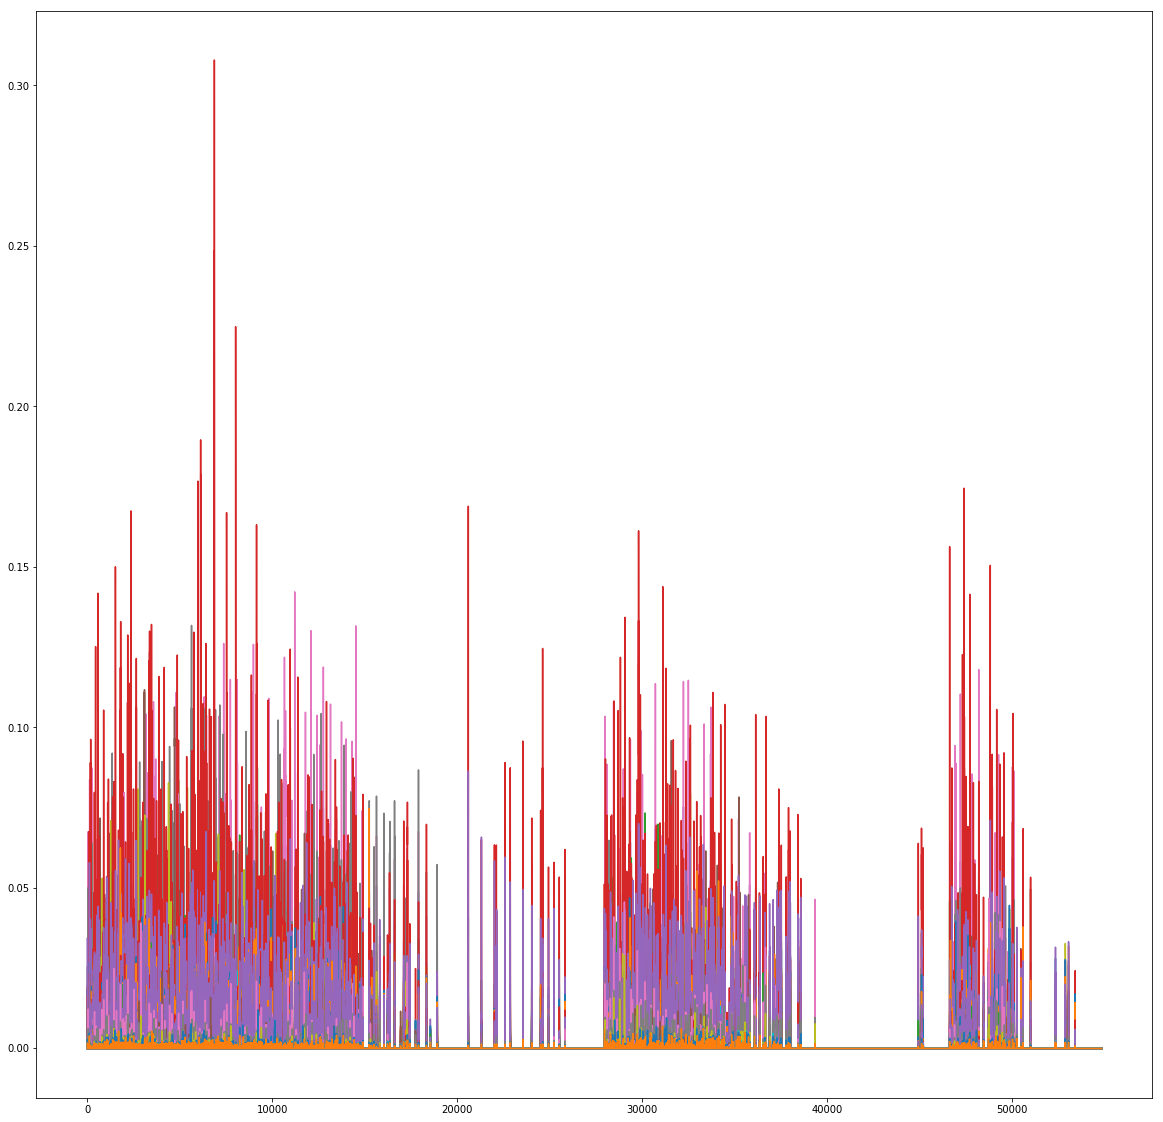

In [8]:
tumors = []

for i in range(0, len(ones)):
    tumors.append(MSI_reshaped[ones[i], :])

plt.figure(figsize = (20, 20))
plt.plot(tumors)

tumors_nd = np.array(tumors)
print("Size of all tumors with spectra data:", tumors_nd.size)
print("Shape of all tumors with spectra data:", tumors_nd.shape)

# plt.plot(tumors_nd)

# Get Index of Specific Proteins m/z Values

In [9]:
mz_val = gc_data['peak_list'][:, 0]
print(mz_val)
print("Type of mz_val is:", type(mz_val))
mz_val_list = list(mz_val)
mz = [3374, 3409, 3445, 4967, 14021]
mz_val_list_indexes = []

for i in mz:
    print("index of protein with m/z values equal to %d is: %d" % (i, mz_val_list.index(i)))
    mz_val_list_indexes.append(mz_val_list.index(i))

[ 2757.  3006.  3196.  3330.  3374.  3409.  3445.  3482.  3516.  3598.
  3670.  3711.  3908.  4051.  4128.  4156.  4192.  4621.  4748.  4788.
  4828.  4912.  4940.  4967.  5003.  5145.  5173.  5655.  5699.  6180.
  6227.  6279.  6368.  6652.  6691.  6721.  6897.  6953.  6982.  7009.
  7568.  7671.  7756.  8101.  8417.  8454.  8571.  8606.  8694.  9192.
  9268.  9335.  9414.  9467.  9521.  9752. 10099. 10319. 10843. 11315.
 11355. 11615. 11657. 11831. 12179. 12234. 12285. 12354. 13166. 13436.
 13793. 13826. 13862. 13915. 14021. 14708. 15144. 15346. 15888. 21326.
 21830. 22550.]
Type of mz_val is: <class 'numpy.ndarray'>
index of protein with m/z values equal to 3374 is: 4
index of protein with m/z values equal to 3409 is: 5
index of protein with m/z values equal to 3445 is: 6
index of protein with m/z values equal to 4967 is: 23
index of protein with m/z values equal to 14021 is: 74


# Applying PCA in data

## Reduction to 2D

In [23]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
gc_data['mz_val_mod'] = lb_make.fit_transform(tumors_nd[:, 4])
colors = gc_data['mz_val_mod']

In [19]:
pca = PCA(n_components = 2)
X_1 = pca.fit(tumors_nd).transform(tumors_nd)
X_1.shape

(54833, 2)

### Scatter plot of reduced data

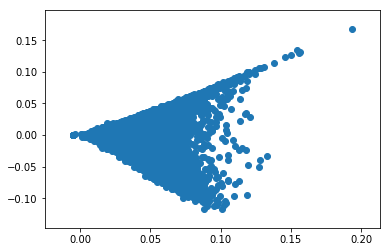

In [21]:
plt.scatter(X_1[:,0],X_1[:,1])

### Explained variance of 2D reduction

In [22]:
pca.explained_variance_ratio_

array([0.54396114, 0.23553068])

### PCA scatter using protein intensity value at m/z = 3374

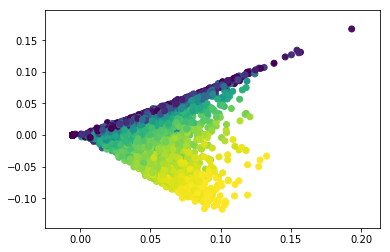

In [24]:
plt.scatter(X_1[:, 0], X_1[:, 1], c = colors)

## Applying the PCA to reduce the dimension to 3

In [38]:
pca_3 = PCA(n_components = 3)
X_3 = pca_3.fit(tumors_nd).transform(tumors_nd)
X_3.shape

(54833, 3)

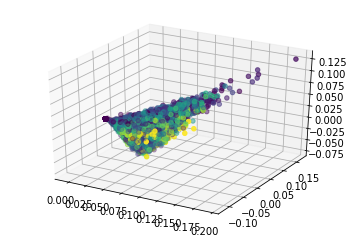

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3[:,0],X_3[:,1],X_3[:,2],c = colors)
plt.show()

In [40]:
pca_3.explained_variance_ratio_

array([0.54396114, 0.23553068, 0.07492371])

## Applying the PCA to reduce the dimension to 5

In [42]:
pca_5 = PCA(n_components = 5)
X_5 = pca_5.fit(tumors_nd).transform(tumors_nd)
X_5.shape

(54833, 5)

In [43]:
pca_5.explained_variance_ratio_

array([0.54396114, 0.23553068, 0.07492371, 0.03311781, 0.02314985])